# Decision Trees
Version: July-2020

## Author - Priya Asokan

## Instructions

Complete the following tasks and answer the questions:

1. Test both entropy and the gini coefficient. Which performs better and why?
2. What are the best hyperparameter settings for both?
3. Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?
4. Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?
5. What are the implications of using this type of machine learning algorithm for breast cancer analysis?

## Summary
1. Decision Tree with Entropy coefficient performs better.The AUC value for Entropy is 0.97.Because it performs the best Decision Tree split in this case.
2. Best HyperParameter settings for both - {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}
3. After visualizing both the tree models- Different features are selected for different criterion.
4. Model performance in Test Set from the Best Model selected - AUC= 0.99
   Class -0 Precision - 0.91, Recall -0.98
   Class -1 Precision - 0.97, Recall -0.85
   I would like to maximize the recall value for malignant class(1), so that we can better predict malignant cancer cases.
5. Using Decision Tree on classification problem like Breast cancer analysis, gives a very clear interpretability for a binary classifier,prediction logic is visual and shows the feature importance by having more important features higher in the tree.


## Data Read

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

import os
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
# Set Random variable
SEED=2005

In [3]:
# Read the Data
url = 'https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/WI_Breast_Cancer.csv'
BC_df = pd.read_csv(url,sep=',')

In [4]:
#Assign Column Names
BC_df.columns=['codenumber','Class','clump_thickness','size_uniformity','shape_uniformity','marginal_adhesion',
               'epithelial_size','bare_nucleoli','bland_chromatin','normal_nucleoli','mitoses']


In [5]:
# Pick top 5 rows
BC_df.head()

,codenumber,Class,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,1002945,2,5,4,4,5,7,10,3,2,1
1,1015425,2,3,1,1,1,2,2,3,1,1
2,1016277,2,6,8,8,1,3,4,3,7,1
3,1017023,2,4,1,1,3,2,1,3,1,1
4,1017122,4,8,10,10,8,7,10,9,7,1


In [6]:
BC_df.shape

(698, 11)

## Data Preparation

In [7]:
#Check for any missing values
print(BC_df.isnull().sum())

codenumber           0
Class                0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
dtype: int64


In [8]:
#Check for Data Types
BC_df.dtypes

codenumber           int64
Class                int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
dtype: object

In [9]:
BC_df.head()

,codenumber,Class,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,1002945,2,5,4,4,5,7,10,3,2,1
1,1015425,2,3,1,1,1,2,2,3,1,1
2,1016277,2,6,8,8,1,3,4,3,7,1
3,1017023,2,4,1,1,3,2,1,3,1,1
4,1017122,4,8,10,10,8,7,10,9,7,1


In [10]:
# Replace class values(2 with 0 & 4 with 1)
BC_df.loc[BC_df.loc[:, "Class"] == 2, "Class"] = 0
BC_df.loc[BC_df.loc[:, "Class"] == 4, "Class"] = 1

In [11]:
# Check 'Class' values
BC_df.head()
BC_df['Class'].unique()

array([0, 1], dtype=int64)

## Data Split

In [12]:
# Seperate train, tune & test set
BC_df_train, BC_df_tune_test = train_test_split(BC_df,
                                    test_size=0.3,
                                    random_state=SEED,
                                    shuffle=True,
                                    stratify=None)

In [13]:
# further evenly split between tune and test
BC_df_tune, BC_df_test = train_test_split(BC_df_tune_test,
                                    test_size=0.5,
                                    random_state=SEED,
                                    shuffle=True,
                                    stratify=None)

In [14]:
# double check data dimensions after the split
print(BC_df.shape)
print(BC_df_train.shape)
print(BC_df_tune.shape)
print(BC_df_test.shape)

(698, 11)
(488, 11)
(105, 11)
(105, 11)


In [15]:
# Set the target train, tune and test values
y_train = BC_df_train["Class"].to_numpy()
y_tune = BC_df_tune["Class"].to_numpy()
y_test = BC_df_test["Class"].to_numpy()

In [16]:
# drop target to predict
BC_df_train = BC_df_train.drop(["Class"], axis=1)
BC_df_tune = BC_df_tune.drop(["Class"], axis=1)
BC_df_test = BC_df_test.drop(["Class"], axis=1)

In [17]:
# feature matrix
X_train = BC_df_train.to_numpy()
X_tune = BC_df_tune.to_numpy()
X_test = BC_df_test.to_numpy()

In [18]:
# double check dimensions in training set
print(BC_df_train.shape)
print(X_train.shape)
print(X_tune.shape)
print(y_train.shape)
print(y_tune.shape)

# double check dimensions in test set
print(BC_df_test.shape)
print(X_test.shape)
print(y_test.shape)

(488, 10)
(488, 10)
(105, 10)
(488,)
(105,)
(105, 10)
(105, 10)
(105,)


In [19]:
feature_columns = BC_df_train.columns
feature_columns

Index(['codenumber', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object')

## Generate Decision Tree Model

In [20]:
# Create a DT with Gini criterion
BC_tree__gini = DecisionTreeClassifier(criterion="gini", max_depth=4)
BC_tree__gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
#Check for feature rankings
BC_tree__gini.feature_importances_

array([0.        , 0.08296705, 0.80041818, 0.0045166 , 0.02638396,
       0.00957509, 0.00969584, 0.05118297, 0.00847795, 0.00678236])

In [22]:
#Show Tree method to display the Tree
def show_tree(out_name, model, feature_names):
    dotfile = open(out_name + ".dot", "w")
    export_graphviz(model, out_file=dotfile, filled=True, rounded=True, feature_names=feature_names)
    dotfile.close()

    os.system("dot -Tpng {}.dot -o {}.png".format(out_name, out_name))

    return(Image(filename=out_name + ".png", width=500, height=500))

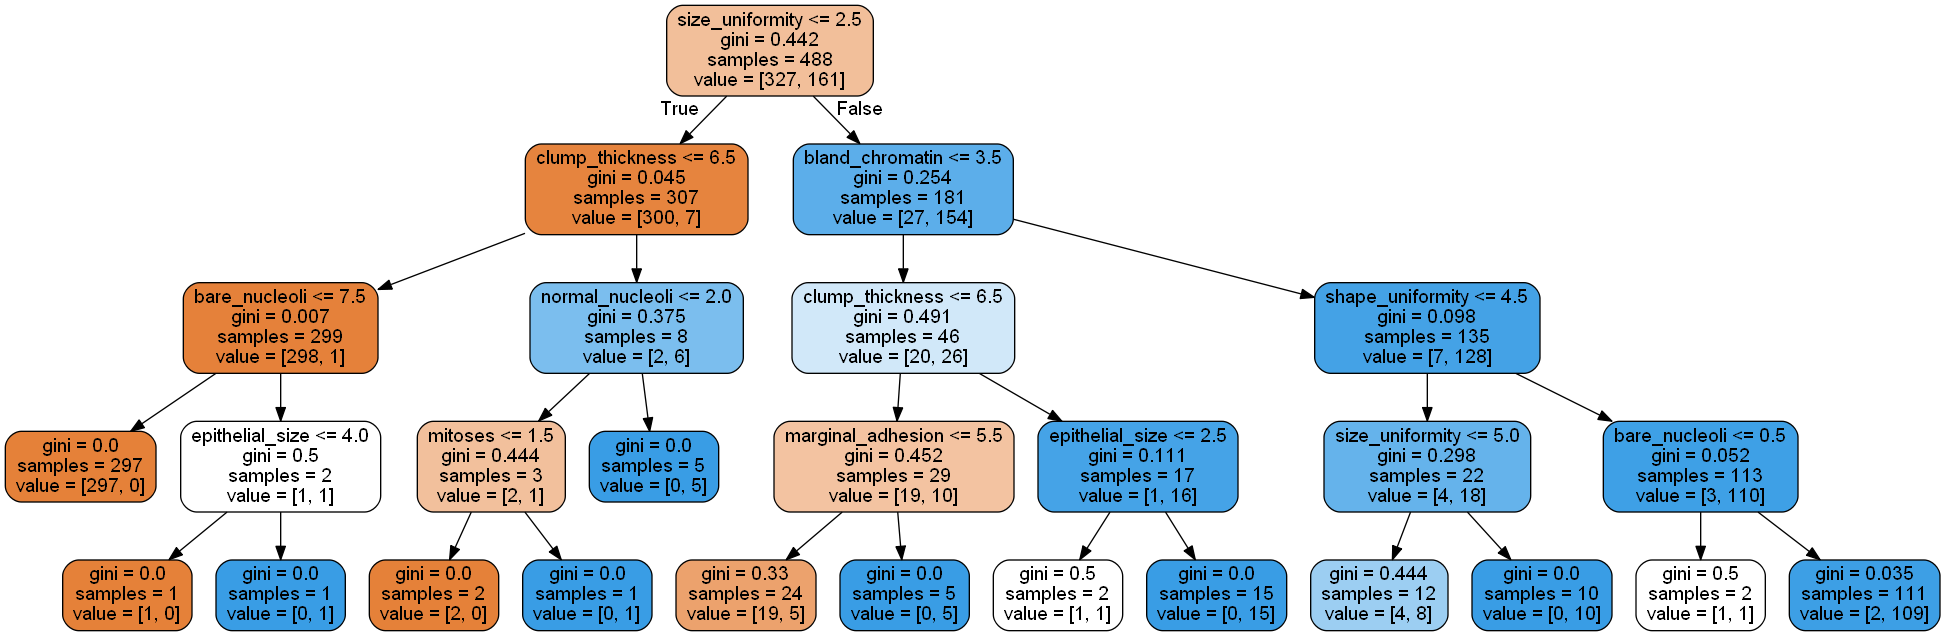

In [23]:
#Function call
show_tree("BC_tree_gini", BC_tree__gini, BC_df_train.columns)

In [24]:
#Create a DT with entropy criterion
BC_tree__entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4)
BC_tree__entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

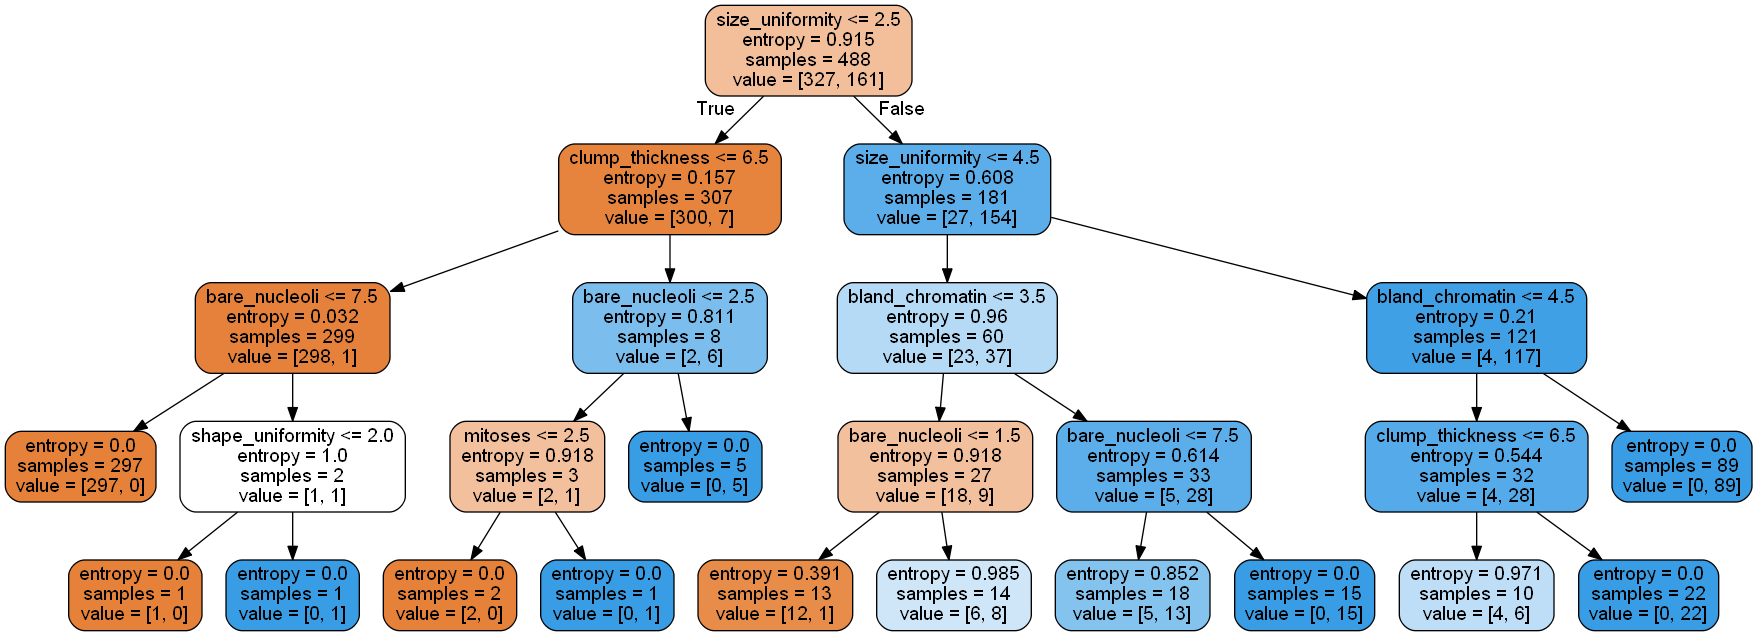

In [25]:
# Show Tree
show_tree("BC_tree_entopy", BC_tree__entropy, BC_df_train.columns)

## Model Performance on Tune Set

In [26]:
# Performance metrics for classification model
def metrics(modelName,X_train,y_train,X_tune,y_tune): 
    y_tune_pred = modelName.predict(X_tune)
    print('Confusion Matrix')
    # print out confusion matrix
    cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
    print(cm)
    
    # calculate accuracy on tune set    
    accuracyScoretune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)
    print('Accuracy of Tune Set : ' + str(accuracyScoretune))
    
    # prediction accuracy on training set
    y_train_pred = modelName.predict(X_train)
    accuracyScoreTrain = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    print('Accuracy of Train Set : ' + str(accuracyScoreTrain))
    
    # Draw ROC curve
    y_tune_prob = modelName.predict_proba(X_tune)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
    roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)
    plt.plot(fpr, tpr, color="blue", label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
    plt.title("Receiver Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.show()
    
    # comprehensive classification report
    print(classification_report(y_true=y_tune, y_pred=y_tune_pred)) 

Confusion Matrix
[[62  3]
 [ 3 37]]
Accuracy of Tune Set : 0.9428571428571428
Accuracy of Train Set : 0.9733606557377049


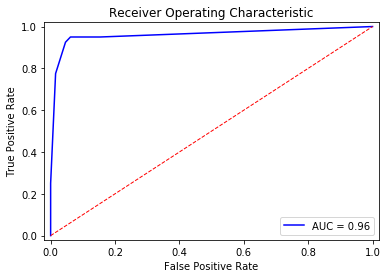

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.93      0.93      0.93        40

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



In [27]:
# Get Metrics for Decision Tree with Gini criterion
metrics(BC_tree__gini,X_train,y_train,X_tune,y_tune)

Confusion Matrix
[[60  5]
 [ 1 39]]
Accuracy of Tune Set : 0.9428571428571428
Accuracy of Train Set : 0.9672131147540983


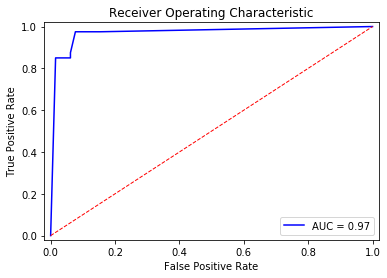

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.89      0.97      0.93        40

    accuracy                           0.94       105
   macro avg       0.93      0.95      0.94       105
weighted avg       0.95      0.94      0.94       105



In [28]:
# Get Metrics for Decision Tree with Entropy criterion
metrics(BC_tree__entropy,X_train,y_train,X_tune,y_tune)

#### Accuracy is higher on training set when compared to tune set. Accuracy of Entropy Decision tree model is better than Gini Decision Tree Model

## Grid Search CV for Hyper-parameter tuning

In [29]:
# grid search
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=SEED),
    param_grid={
        "criterion": ["entropy", "gini"],
        "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
        "min_samples_leaf": [10, 20, 30, 40, 50]
    },
    scoring="roc_auc",
    n_jobs=10,
    cv=StratifiedKFold(n_splits=5, random_state=SEED),
    verbose=1,
    refit=True
)

# fit in training data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\priya\.conda\envs\uwdatasci420\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:    1.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2005, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2005,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
       

In [30]:
# output detailed cross-validation results
print(grid.cv_results_)

{'mean_fit_time': array([0.00199971, 0.0018003 , 0.00179987, 0.00120015, 0.00159988,
       0.00159974, 0.00159988, 0.00139985, 0.00119591, 0.00160065,
       0.00140018, 0.00179977, 0.00140104, 0.00080004, 0.00120025,
       0.00119967, 0.00100021, 0.00099869, 0.00099692, 0.00119886,
       0.0018003 , 0.00120029, 0.00099993, 0.00160003, 0.00119948,
       0.00099978, 0.00100713, 0.00120053, 0.00179949, 0.00099964,
       0.00119915, 0.00100145, 0.00079851, 0.00081005, 0.00080004,
       0.00139999, 0.00099988, 0.00140028, 0.00119925, 0.00099993,
       0.00120049, 0.0012001 , 0.00160046, 0.0013998 , 0.00120039,
       0.00139961, 0.00140028, 0.00080047, 0.00100036, 0.00101209,
       0.00119185, 0.00139995, 0.00180178, 0.0012547 , 0.00159979,
       0.00140004, 0.00159869, 0.00119967, 0.0009994 , 0.00100002,
       0.00098882, 0.00161452, 0.00099902, 0.00119624, 0.00119839,
       0.00098748, 0.00160007, 0.00120087, 0.00080328, 0.00139995,
       0.00121098, 0.00100036, 0.0009995 , 0

In [31]:
# best estimator determined by GridSearchCV
estimator_best = grid.best_estimator_
print(estimator_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2005, splitter='best')


In [32]:
# best cross-validation score. 
print(grid.best_score_)

0.9772078962703963


In [33]:
# best hyper-parameters selected
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}


Confusion Matrix
[[61  4]
 [ 6 34]]
Accuracy of Tune Set : 0.9047619047619048
Accuracy of Train Set : 0.9487704918032787


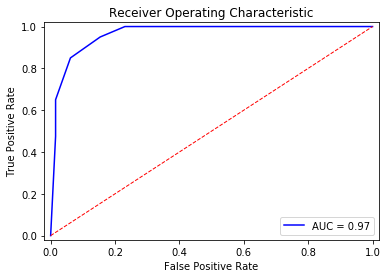

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        65
           1       0.89      0.85      0.87        40

    accuracy                           0.90       105
   macro avg       0.90      0.89      0.90       105
weighted avg       0.90      0.90      0.90       105



In [34]:
# Get Metrics for Grid Model
metrics(grid,X_train,y_train,X_tune,y_tune)

## Model performance in test set from the best model selected

In [35]:
# predict probability on test set
y_test_prob = estimator_best.predict_proba(X_test)[:,1]

# predict class label on test set
y_test_pred = estimator_best.predict(X_test)

In [36]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[64  1]
 [ 6 34]]


In [37]:
# calculate accuracy 
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9333333333333333

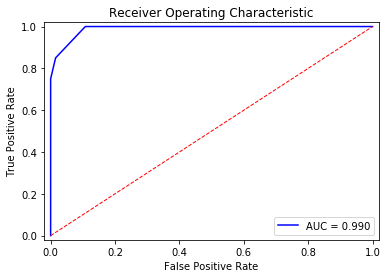

In [38]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [39]:
# comprehensive classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.97      0.85      0.91        40

    accuracy                           0.93       105
   macro avg       0.94      0.92      0.93       105
weighted avg       0.94      0.93      0.93       105



### The AUC value for Test  Set from the best model selected is 0.99